<a href="https://colab.research.google.com/github/davifebdn/visualitzacio_exploratoria/blob/main/Data_Science_Sprint_3_T01_Visualitzaci%C3%B3_gr%C3%A0fica_d'un_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S03 T01: Visualització gràfica d'un dataset
Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn. 

## Nivell 1

### Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

*    Una variable categòrica (UniqueCarrier)
*    Una variable numèrica (ArrDelay)
*    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
*    Dues variables numèriques (ArrDelay i DepDelay)
*    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
*    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).





In [1]:
#Importació del document que vaig fer al S2 T05
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1EyE8slhQeOY7eE36xT72verJxZrmVQNd/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('AirlinesDelayDavid.csv')

df = pd.read_csv('AirlinesDelayDavid.csv')
df.head()

,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,MeanVelocity,Late
0,0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,376.019135,False
1,1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,315.370887,True
2,2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,282.541875,True
3,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,...,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,382.518231,True
4,4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,367.027094,True


In [2]:
#Import

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Variable categòrica

Per la variable categòrica de `UniqueCarrier` he volgut fer un gràfic de barres, i que quedés endreçat de major a menor número de vols.

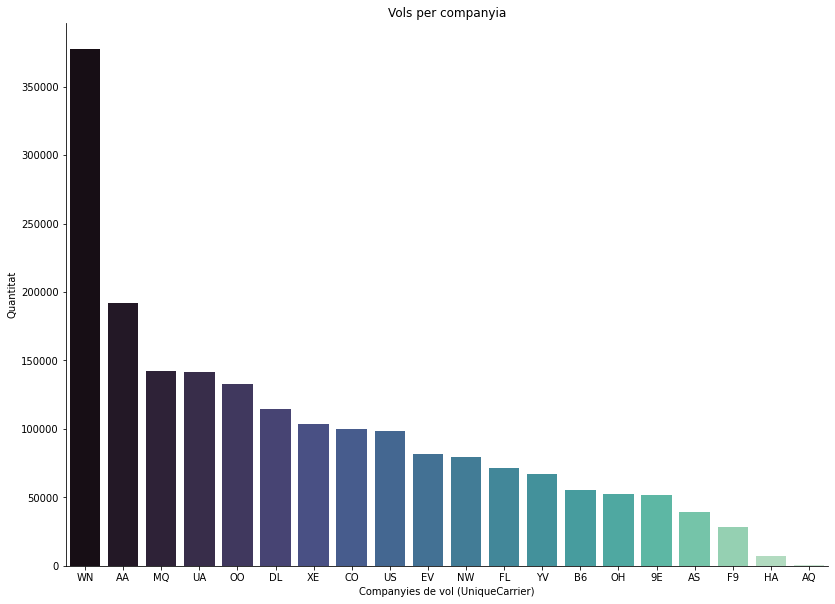

In [3]:
#Una variable categòrica (UniqueCarrier)

uCarrier = sns.catplot(x="UniqueCarrier", kind="count", palette="mako", data=df, order=df['UniqueCarrier'].value_counts().index, height=8.27, aspect=11.7/8.27)
uCarrier.set_axis_labels("Companyies de vol (UniqueCarrier)", "Quantitat")
plt.title("Vols per companyia")
plt.show()

Mirant la gràfica, podem veure que la companyia WN destaca de la resta amb més de 350.000 vols en total, seguit de la companyia AA amb gairebé 200.000, i, per últim, la companyia AQ amb tants pocs vols que no es pot veure visualment la barra en aquesta escala.

####Variable numèrica

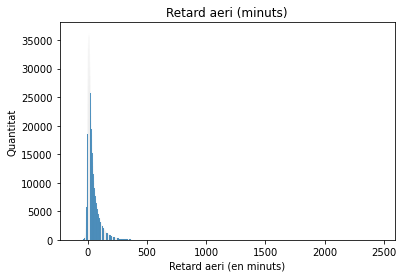

In [5]:
retard = sns.histplot(data=df, x="ArrDelay", pthresh=500)
plt.title("Retard aeri (minuts)")
plt.xlabel("Retard aeri (en minuts)")
plt.ylabel("Quantitat")
plt.show()

Es pot veure a la gràfica que la major quantitat de retard aeri es concentra al voltant de 0 i passats uns minuts.

####Variable numèrica i variable categòrica

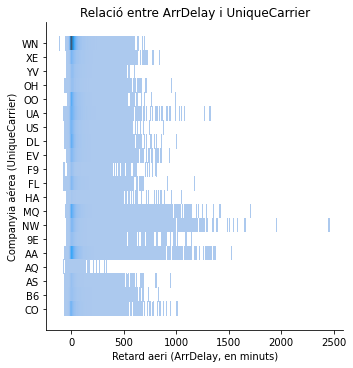

In [6]:
#ArrDelay i UniqueCarrier
sns.displot(x=df['ArrDelay'], y=df["UniqueCarrier"])
plt.title("Relació entre ArrDelay i UniqueCarrier")
plt.xlabel("Retard aeri (ArrDelay, en minuts)")
plt.ylabel("Companyia aérea (UniqueCarrier)")
plt.show()

Mirant la relació entre variable numèrica (ArrDelay) i la categòrica (UniqueCarrier), hi han algunes diferències. La companyia amb menys retard aeri és AQ. Però vam veure que a la primera gràfica que també és la companyia amb menys número de vols. La companyia que tenia més número de vols (WN), té una altra concentració de punts al voltant dels 0 minuts. En canv, la companyia MW, és la que té una distribució més extensa de retards, sent la única que té dades de retard de fins a 2.500 minuts.

####Dues variables numèriques

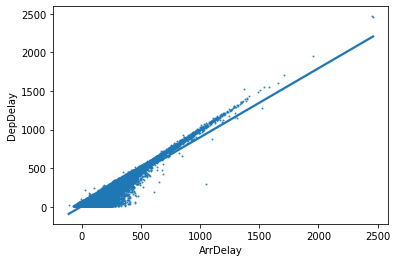

In [7]:
#Dues variables numèriques (ArrDelay i DepDelay)

sns.regplot(x=df["ArrDelay"], y=df["DepDelay"], scatter_kws={'s':1})
plt.show()

La gràfica mostra que hi ha una forta relació entre ArrDelay i DepDelay. He reduït el tamany dels punts i es continua mantenint la relació entre les dues variables. Es pot veure com hi ha dades d'ArrDelay per sota de 0, però no n'hi ha de DepDelay.

####Tres variables


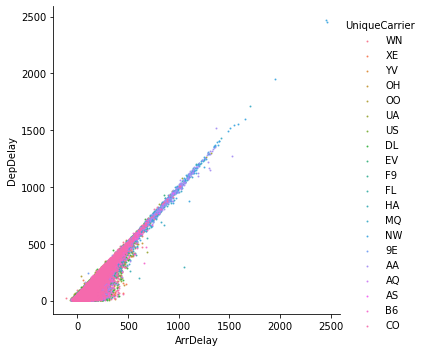

In [8]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)
sns.lmplot( x="ArrDelay", y="DepDelay", data=df, fit_reg=False, hue='UniqueCarrier', legend=True, scatter_kws={'s':1})
sns.set(rc={'figure.figsize':(22,16)})
plt.show()

En aquesta gràfia s'afegeis la variable categòrica UniqueCarrier. El que permet diferenciar les companyies, aportant més informació que la gràfica anterior.

####Més de tres variables

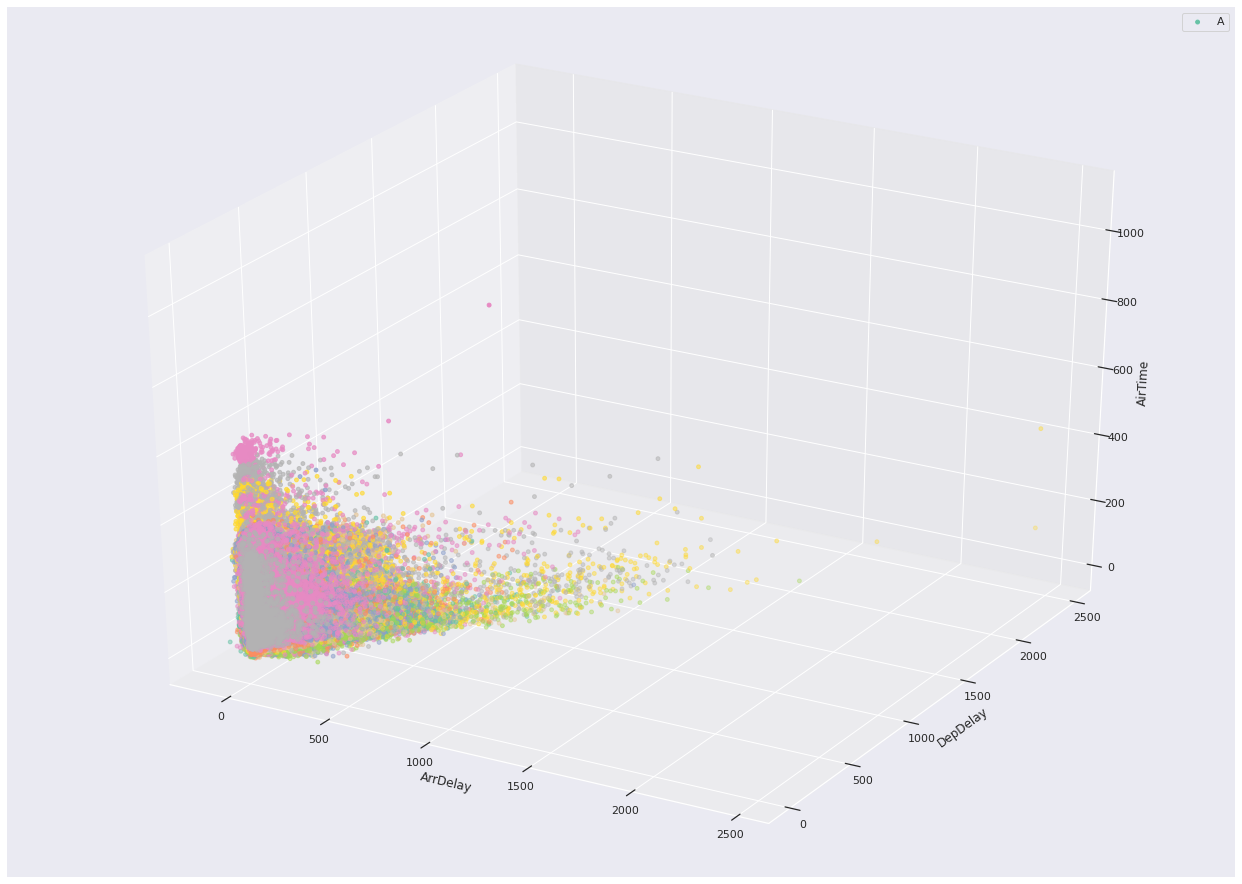

In [21]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#He buscat aquest codi poer afegir la 4a dimensió com a color
color_labels = df['UniqueCarrier'].unique()
rgb_values = sns.color_palette("Set2", 20)
color_map = dict(zip(color_labels, rgb_values))
#
ax.scatter(df['ArrDelay'], df['DepDelay'], df['AirTime'], c=df['UniqueCarrier'].map(color_map), s=15)
ax.set_xlabel('ArrDelay')
ax.set_ylabel('DepDelay')
ax.set_zlabel('AirTime')
ax.legend('ArrDelay')
plt.show()

Amb més de tres variables la mostra de totes les variables es comença a complicar. Per les tres variables numèriques he cercat la manera de fer una gràfica en 3D amb 3 eixos. Llavors, per afegir la última variable, que és categòrica, he hagut de crear primer un mapa amb tants colors com empreses aèrees hi ha. Així, afegint la quarta dimensió a la gràfica.

###Exercici 2

Exporta els gràfics com imatges o com html.